In [1]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/")
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import numpy as np
# font_path = "C:/WINDOWS/FONTS/TIMES.TTF"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family=font_name)

In [2]:
rcparams = {"font.family":"serif", "mathtext.fontset":"stix"}
plt.rcParams.update(rcparams)
plt.rcParams["font.serif"] = ["Time New Roman"] + plt.rcParams["font.serif"]

mpl.rc('xtick', labelsize=7)
mpl.rc('ytick', labelsize=10)

In [3]:
def value_outsys(A, length):
    temp_list = []
    d = len(A)
    avg = sum(A) / d
    for i in range(length):
        temp_list.append(avg)
    return temp_list

In [4]:
def average_outsys(A, term):
    length = len(A)
    temp_list = []
    temp_value = 0
    for i in range(length):
        temp_value += A[i]
        if i % term == term-1:
            temp_list.append(temp_value / (term))
            temp_value = 0
    temp_list.insert(0, A[0])
    return temp_list

In [5]:
Y_1 = np.load("/content/drive/My Drive/Colab Notebooks/result/beta/SD_alpha.npy") / 1000
Y_2 = np.load("/content/drive/My Drive/Colab Notebooks/result/beta/SC_alpha.npy") / 1000
Y_3 = np.load('/content/drive/My Drive/Colab Notebooks/result/beta/CNN_alpha.npy') / 1000
Y_4 = np.load('/content/drive/My Drive/Colab Notebooks/result/beta/FCN_alpha.npy') / 1000

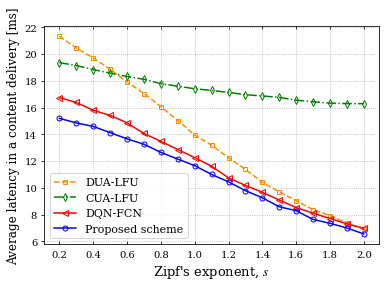

In [6]:
list_size = np.array(range(2, 21, 1)) / 10
x_range = np.array(range(2, 21, 2)) / 10
x = np.array(range(2, 21, 2)) / 10

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(list_size, Y_1, '--', marker='s', markersize=4, color='darkorange', fillstyle='none', label='DUA-LFU')
ax.plot(list_size, Y_2, '-.', marker='d', markersize=5, color='green', fillstyle='none', label='CUA-LFU')
ax.plot(list_size, Y_4, color='r', marker='<', markersize=6, fillstyle='none', label='DQN-FCN')
ax.plot(list_size, Y_3, color='b', marker='o', markersize=5, fillstyle='none', label='Proposed scheme')

plt.xlabel("Zipf's exponent, $s$", fontsize=13)
plt.xticks(x_range, x, rotation=0)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=10, top=True)
plt.ylabel("Average latency in a content delivery [ms]", fontsize=12)
plt.legend(fontsize=11, loc="best")
plt.grid(True, alpha=2.0, linestyle=':')
plt.show()